In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv("cleaned_autocentral_data.csv")

# Independent variables
X = df[["year", "brand", "model", "mileage", "cv", "fuel_type", "transmission"]]

# Target variable
y = df["price"]

# Categorical & numeric columns
categorical_cols = ["brand", "model", "fuel_type", "transmission"]
numeric_cols = ["year", "mileage", "cv"]

# Preprocessing for categorical data → one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# Build the regression pipeline
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Example prediction
sample = pd.DataFrame([{
    "year": 4,
    "brand": "renault",
    "model": "Clio",
    "mileage": 17000,
    "cv": 5,
    "fuel_type": 0,
    "transmission": 0
}])
predicted_price = model.predict(sample)[0]
print("Predicted price =", predicted_price)

R² score: 0.4775
Mean Absolute Error (MAE): 21242.71
Root Mean Squared Error (RMSE): 36143.78
Predicted price = 57792.99434087323


```
0.0 – 0.3 = poor
0.3 – 0.6 = decent
0.6 – 0.8 = good
```
0.4775 is not bad
although MAE is quite high

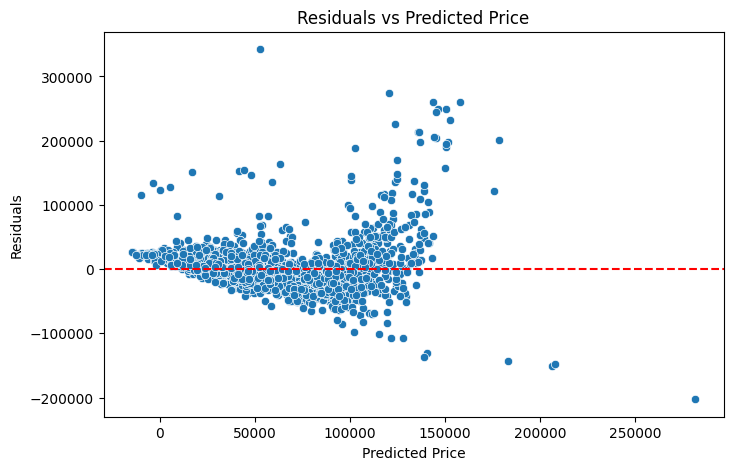

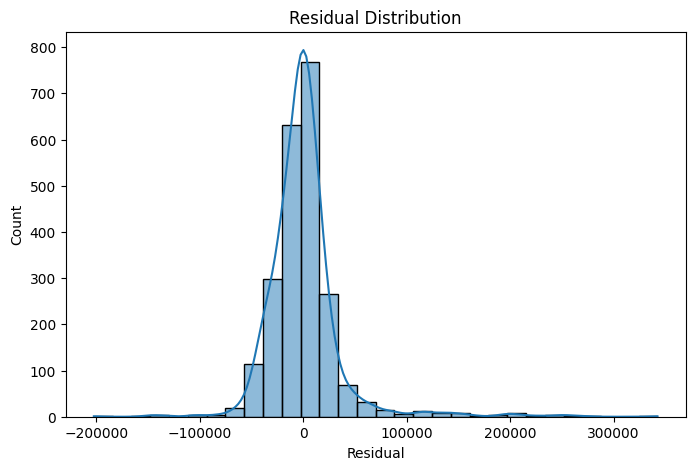

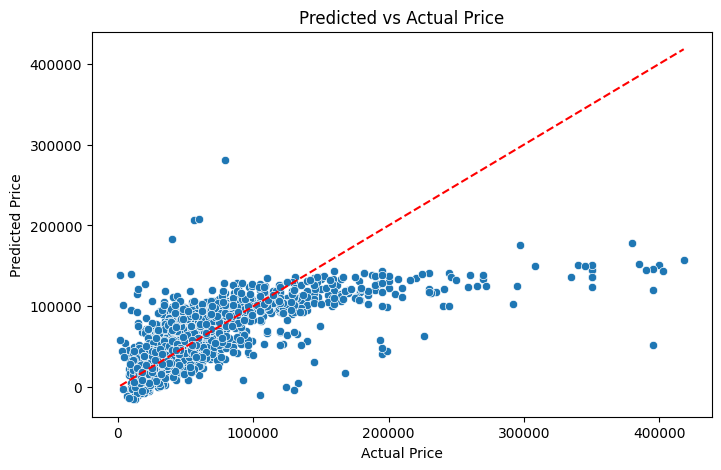

In [2]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual")
plt.title("Residual Distribution")
plt.show()

# Predicted vs Actual plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.show()